In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy.stats import stats

In [ ]:
df_new=pd.read_csv('/content/Preprocessed_survey(1).csv')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1255 non-null   float64
 1   Gender                     1255 non-null   object 
 2   Country                    1255 non-null   object 
 3   state                      1255 non-null   object 
 4   self_employed              1255 non-null   object 
 5   family_history             1255 non-null   object 
 6   treatment                  1255 non-null   object 
 7   work_interfere             1255 non-null   object 
 8   no_employees               1255 non-null   object 
 9   remote_work                1255 non-null   object 
 10  tech_company               1255 non-null   object 
 11  benefits                   1255 non-null   object 
 12  care_options               1255 non-null   object 
 13  wellness_program           1255 non-null   objec

In [ ]:
df_new.describe()

,Age
count,1255.000000
mean,32.023981
std,7.369345
min,5.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [ ]:
df_new['Age'].value_counts()

,count
Age,
29.000000,85
32.000000,81
26.000000,75
33.000000,70
27.000000,70
28.000000,67
31.000000,67
34.000000,65
30.000000,63


In [ ]:
#UNIVARIATE ANALYSIS

#**UNIVARIATE_ANALYSIS & BIVARIATE_ANALYSIS**

/tmp/ipython-input-52-3659366719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Age'])


<Axes: xlabel='Age', ylabel='Density'>

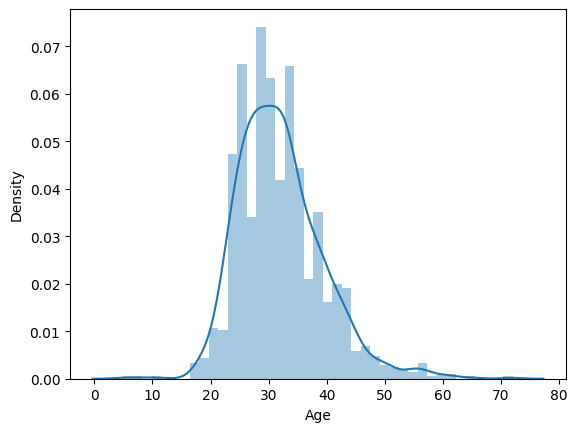

In [ ]:
sns.distplot(df_new['Age'])

This chart was used to show how the ages of survey participants are spread out, making it easy to identify the most common age group. The data reveals that most respondents are between 20 and 40 years old, with a peak around age 30, indicating that the survey mainly reflects early to mid-career professionals. This insight can help businesses tailor mental health support to the needs of younger employees, addressing issues like stress and burnout more effectively. However, focusing only on this group could risk neglecting older employees, which might lead to dissatisfaction or lower engagement. It’s important for companies to create inclusive policies that support all age groups in the workplace.

In [ ]:
df_new['Age'].skew()

np.float64(0.912431243144927)

<Axes: xlabel='Country'>

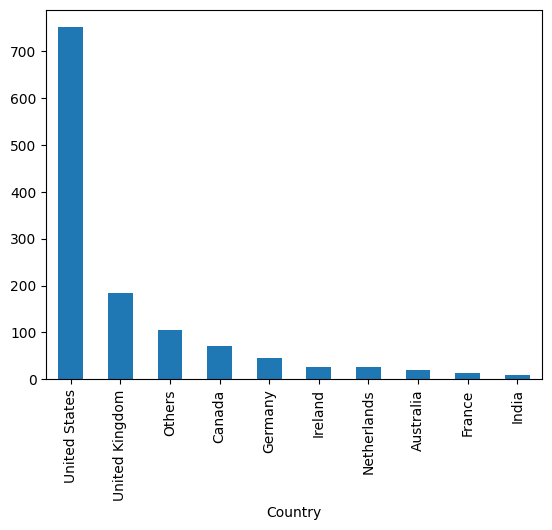

In [ ]:
df_new['Country'].value_counts().plot(kind='bar')

This bar chart displays the number of survey responses by country, clearly showing that the majority of participants are from the United States, followed by the United Kingdom and a mix of other countries. This highlights that the survey findings are largely influenced by perspectives from the U.S. tech workforce. Such insights can help businesses understand the cultural context of the responses and tailor mental health initiatives accordingly. However, the heavy dominance of U.S. responses may limit how well the results apply globally. To create more inclusive and globally relevant strategies, it's important to gather more balanced data from other countries.

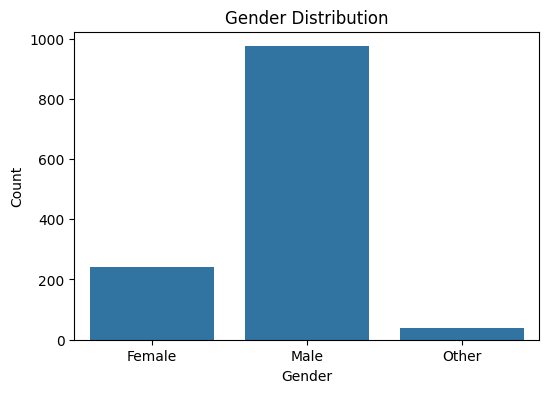

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

This chart shows the gender distribution of survey participants, with a clear majority identifying as male, followed by a smaller number of female respondents, and very few identifying as other. This suggests that the tech workforce represented in the survey is still predominantly male. The insight is useful for understanding whose voices are most reflected in the data and highlights the need for more gender-inclusive mental health strategies. However, the underrepresentation of females and other gender identities means their specific mental health concerns might not be fully captured, pointing to the importance of more diverse participation in future surveys.

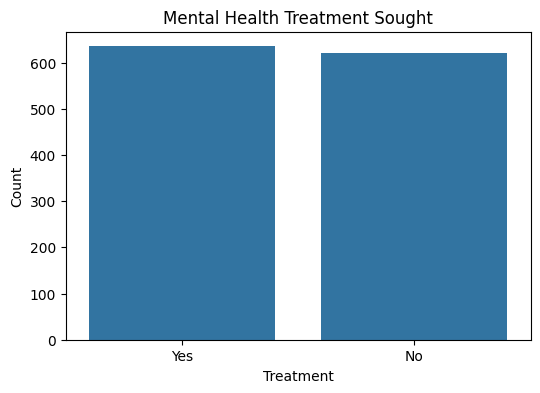

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='treatment')
plt.title('Mental Health Treatment Sought')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()

This chart shows how many people have sought treatment for mental health issues. The counts are fairly balanced, with a slightly higher number of respondents saying "Yes" compared to those who said "No." This suggests that mental health challenges are openly acknowledged by many in the tech industry, and a good portion of individuals are taking steps to seek help. On the positive side, it reflects growing awareness and willingness to address mental health concerns. However, the near-equal split also indicates that a significant number of people may still be avoiding treatment—possibly due to stigma, lack of support, or workplace barriers—which needs to be addressed through better policies and communication.

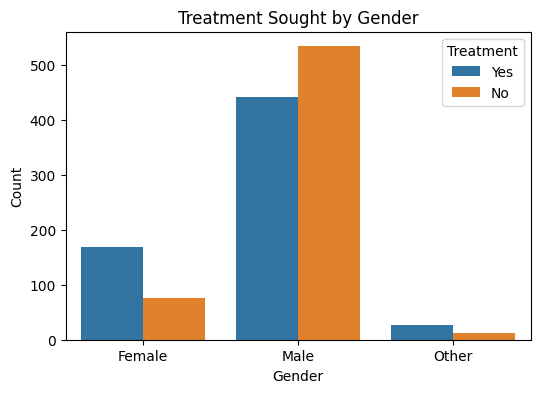

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Gender', hue='treatment')
plt.title('Treatment Sought by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


This chart displays how mental health treatment-seeking behavior varies by gender. It shows that more females have sought treatment compared to those who haven’t, indicating a greater openness or willingness to address mental health issues. In contrast, among males, a larger number have not sought treatment, suggesting possible barriers such as stigma or lack of awareness. For those identifying as "Other," the overall count is low but still leans toward seeking treatment. These patterns highlight the importance of tailoring mental health initiatives to different gender groups, especially encouraging more open dialogue and access for men in the workplace

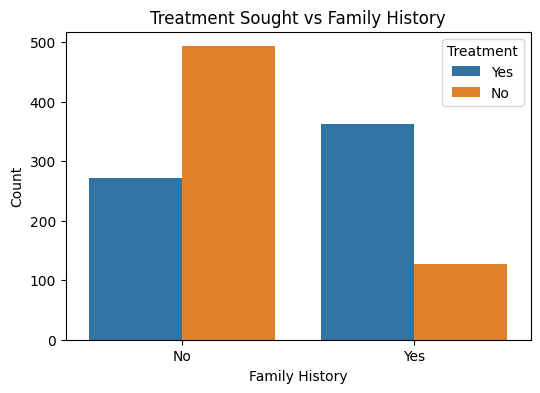

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='family_history', hue='treatment')
plt.title('Treatment Sought vs Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


This chart compares mental health treatment with whether someone has a family history of mental illness. It shows that people with a family history are more likely to seek treatment than those without. On the other hand, most individuals with no family history have not sought treatment. This suggests that personal or family experiences with mental health may increase awareness and willingness to get help. For companies, this highlights the importance of mental health education across all employees—not just those directly affected—so that everyone feels informed and supported enough to seek help when needed.

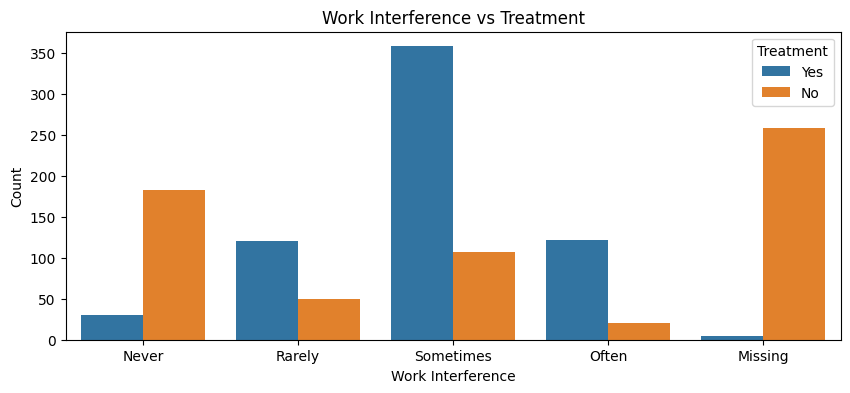

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_new, x='work_interfere', hue='treatment',
              order=['Never', 'Rarely', 'Sometimes', 'Often', 'Missing'])
plt.title('Work Interference vs Treatment')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


This chart compares how often mental health interferes with work and whether individuals sought treatment. It clearly shows that people who reported that their mental health sometimes or often interferes with their work are much more likely to seek treatment. On the other hand, those who said it never interferes mostly did not seek treatment. A large number of “missing” responses also did not seek help, possibly reflecting avoidance or discomfort in discussing mental health. This highlights how work impact is a strong motivator for treatment and shows the need for workplaces to actively address mental health before it reaches the point of affecting job performance.

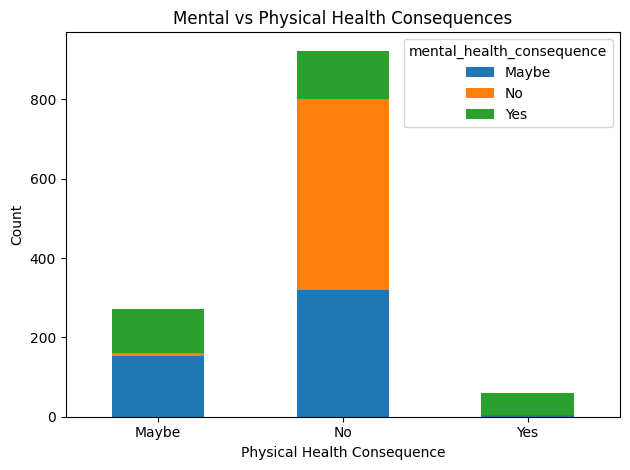

In [ ]:
pd.crosstab(df_new['phys_health_consequence'], df_new['mental_health_consequence']).plot(kind='bar', stacked=True)
plt.title('Mental vs Physical Health Consequences')
plt.xlabel('Physical Health Consequence')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


This chart compares how people perceive the consequences of discussing mental vs. physical health issues at work. It shows that a majority believe there are no negative consequences for discussing physical health, while many are either unsure or do believe there are risks when it comes to mental health. This contrast highlights a clear stigma gap — mental health is still seen as more sensitive or risky to talk about at work. To build a healthier workplace culture, companies need to treat mental and physical health equally and create an environment where employees feel safe addressing both.

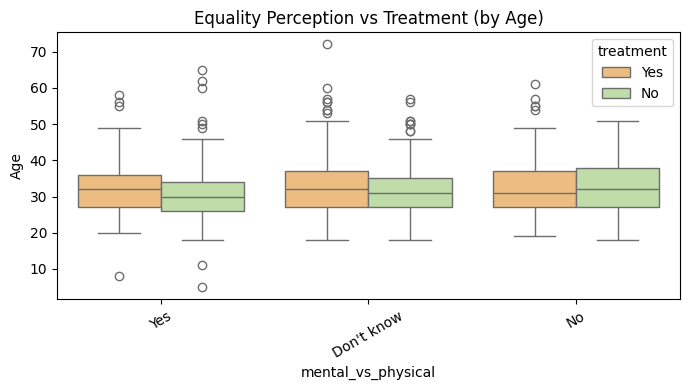

In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='mental_vs_physical', y='Age', hue='treatment', data=df_new, palette="Spectral")
plt.title('Equality Perception vs Treatment (by Age)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


This chart was selected to examine how perceptions of equality between mental and physical health influence treatment-seeking behavior across age groups. The boxplot format clearly shows age distribution and variations for each perception category. Respondents who believe in equality (“Yes”) tend to seek treatment more evenly across age groups, while those who perceive inequality (“No”) show a slightly higher median age among non-treatment seekers. The “Don’t Know” group reflects more variability, suggesting uncertainty may also affect treatment decisions. These insights highlight how attitudes toward mental health parity can shape care-seeking behavior, guiding awareness efforts to reduce stigma and improve access.

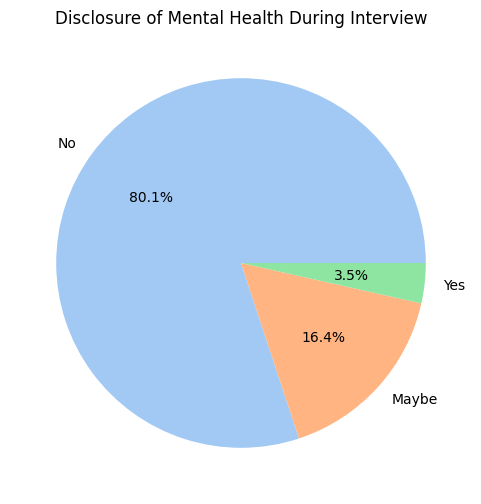

In [ ]:
interview_disclosure = df_new['mental_health_interview'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(interview_disclosure, labels=interview_disclosure.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Disclosure of Mental Health During Interview')
plt.show()


This pie chart shows how comfortable people are with disclosing a mental health issue during a job interview. A large majority — over 80% — said they would not disclose it, while only a small fraction said yes, and a few were unsure. This clearly reflects a fear of judgment or discrimination in hiring processes when it comes to mental health. It shows that despite growing awareness, there’s still a strong stigma attached to being open about mental health in professional settings. Companies should work toward creating safer, non-discriminatory interview environments where honesty about mental well-being is not penalized.

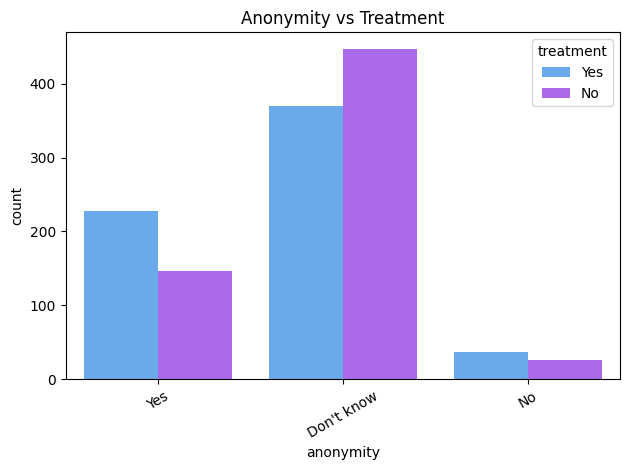

In [ ]:
sns.countplot(data=df_new, x='anonymity', hue='treatment', palette="cool")
plt.title('Anonymity vs Treatment')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


This chart shows how people’s views on anonymity relate to whether they received treatment. Most respondents, treated or not, said “Don’t know,” showing confusion about data privacy. More people who felt their data was anonymous received treatment, suggesting that trust encourages help-seeking. Although few said their data wasn’t anonymous, some still got treatment—possibly due to urgency.
This insight shows the need for clearer communication about privacy. Building trust can lead to better engagement, while confusion may hold people back. Addressing this can positively impact support services and user participation.

/tmp/ipython-input-38-654139772.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='leave', y='Age', hue='treatment', data=df_new, ci=None, palette="magma")


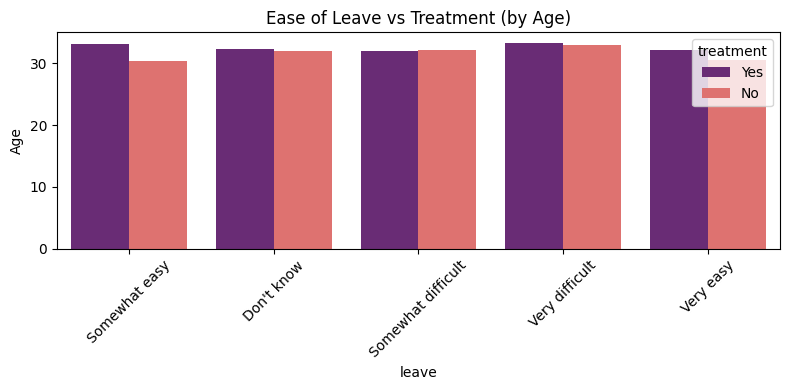

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='leave', y='Age', hue='treatment', data=df_new, ci=None, palette="magma")
plt.title('Ease of Leave vs Treatment (by Age)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart shows the average age of people who received treatment versus those who didn’t, across different levels of ease in taking mental health leave. Across all categories—from "Very easy" to "Very difficult"—the average age stays fairly consistent, mostly in the early 30s. There’s no sharp age difference based on how easy or hard it was to take leave or whether someone got treatment.This suggests that age doesn't play a major role in how people perceive leave ease or access treatment. However, consistently similar age groups reporting varying ease levels shows that company policies and culture might matter more than age itself. Improving leave policies could support better access to treatment regardless of age.

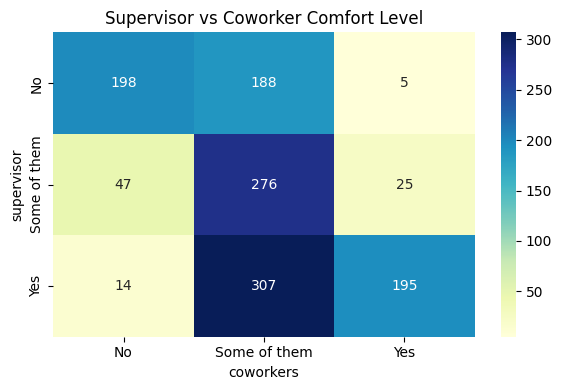

In [ ]:
talk_matrix = pd.crosstab(df_new['supervisor'], df_new['coworkers'])
plt.figure(figsize=(6, 4))
sns.heatmap(talk_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Supervisor vs Coworker Comfort Level')
plt.tight_layout()
plt.show()


This chart shows how comfortable employees feel discussing mental health with their supervisor and coworkers. Most respondents feel comfortable with some coworkers and their supervisor, but a large group doesn’t feel comfortable with either. This highlights a gap in psychological safety at work. When linked with the broader survey topics like support, anonymity, and mental health consequences, it’s clear that many employees may be hesitant to speak up. This insight can help businesses improve mental health awareness and communication through training and wellness programs. Ignoring it could lead to disengagement and higher turnover, impacting overall growth.

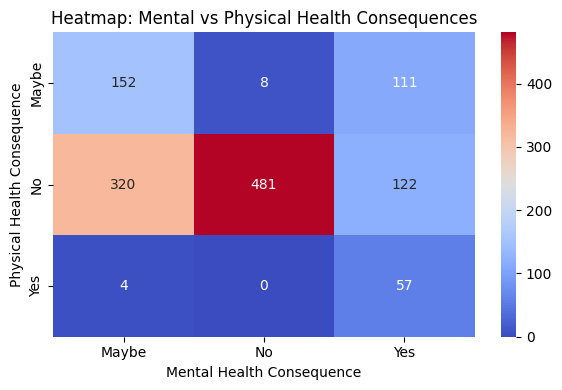

In [ ]:
plt.figure(figsize=(6, 4))
heat_data = pd.crosstab(df_new['phys_health_consequence'], df_new['mental_health_consequence'])
sns.heatmap(heat_data, annot=True, fmt="d", cmap="coolwarm")
plt.title('Heatmap: Mental vs Physical Health Consequences')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Physical Health Consequence')
plt.tight_layout()
plt.show()


This chart was chosen because it effectively shows how employees view the consequences of discussing mental versus physical health at work. The heatmap format makes it easy to compare responses and identify areas where concerns still exist. A large group—481 respondents—believe there are no negative consequences for either, which is encouraging. However, 57 people believe that only mental health discussions might have negative outcomes, and 320 are unsure about mental health but confident about physical health. This clearly shows that mental health still carries more uncertainty and stigma in the workplace. These insights are useful for businesses to identify gaps in support and communication. Promoting mental health awareness and normalizing open conversations can improve trust and employee well-being. If ignored, the fear or hesitation around mental health may lead to silence, stress, and even higher turnover—posing a risk to business growth and employee engagement.

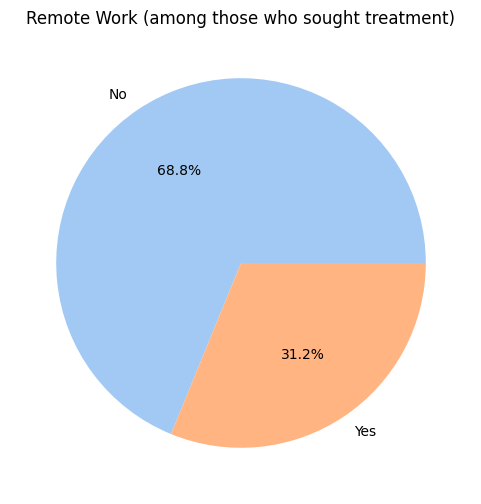

In [ ]:
treatment_remote = df_new[df_new['treatment'] == 'Yes']['remote_work'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(treatment_remote, labels=treatment_remote.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Remote Work (among those who sought treatment)')
plt.show()


This chart was chosen because it reveals the relationship between remote work and seeking mental health treatment. Among those who sought treatment, only 31.2% were remote workers, while a much larger portion—68.8%—did not work remotely. This suggests that individuals working on-site may face more stress or pressure that drives them to seek help, or that remote work may offer a slightly more comfortable environment that reduces the immediate need for treatment.
This insight is important for companies looking to improve employee well-being. Encouraging flexible or remote work options might help reduce stress and support mental health. If ignored, the lack of flexibility could contribute to increased burnout and treatment needs, potentially affecting productivity and retention.

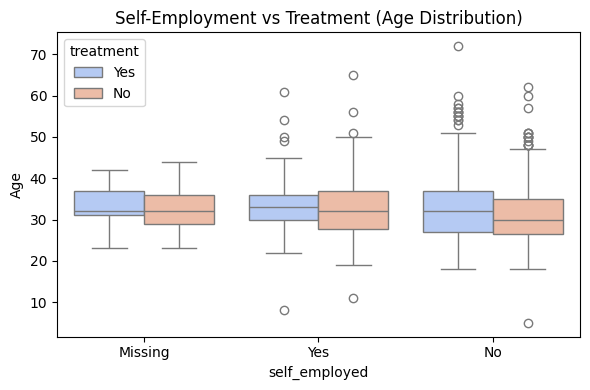

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='self_employed', y='Age', hue='treatment', data=df_new, palette='coolwarm')
plt.title('Self-Employment vs Treatment (Age Distribution)')
plt.tight_layout()
plt.show()


This chart was selected because it explores the relationship between self-employment status and the likelihood of seeking mental health treatment across age groups. The boxplot format reveals central tendencies and variations in age while comparing treatment patterns. Self-employed individuals (especially “Yes”) show a wider age spread and slightly higher median age for those not receiving treatment. In contrast, non–self-employed respondents have more consistent age distributions. The “Missing” category suggests older respondents are more likely to seek treatment. These insights highlight how employment type may influence treatment behavior, guiding businesses and policymakers to better support self-employed individuals and close care gaps.


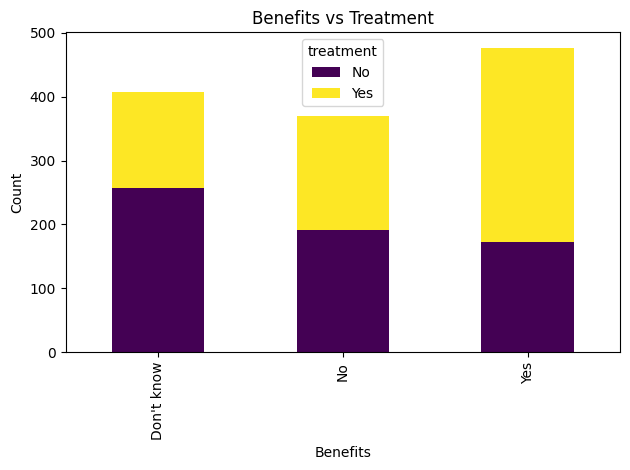

In [ ]:
benefits_treat = pd.crosstab(df_new['benefits'], df_new['treatment'])
benefits_treat.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Benefits vs Treatment')
plt.xlabel('Benefits')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


This chart was selected because it clearly illustrates the relationship between awareness of mental health benefits and whether individuals seek treatment. By breaking down responses by benefit awareness—“Yes,” “No,” and “Don’t Know”—and showing treatment status, it reveals patterns in behavior and support accessibility.

From the chart, it’s evident that those who are aware of their benefits ("Yes") are more likely to seek treatment, with the "Yes" category having the highest number of people receiving treatment. In contrast, respondents who don’t know if benefits exist or say they don’t have them are less likely to seek treatment. Notably, those unaware of their benefits still make up a large portion of those not receiving treatment, indicating a gap in communication or access.

These insights underscore the importance of clearly communicating available mental health benefits to employees. Improved awareness could lead to higher treatment rates, better mental health outcomes, and increased workplace productivity. Ignoring this could mean underutilized support systems and employees silently struggling, ultimately harming long-term business performance and employee retention.



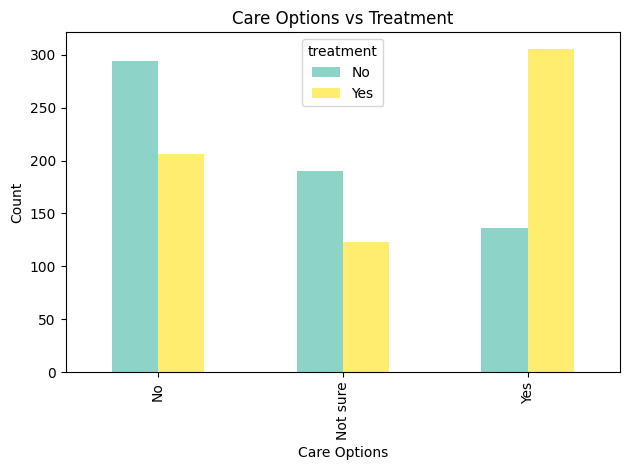

In [ ]:
care_treat = pd.crosstab(df_new['care_options'], df_new['treatment'])
care_treat.plot(kind='bar', colormap='Set3')
plt.title('Care Options vs Treatment')
plt.xlabel('Care Options')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This chart was chosen because it highlights the link between employees' awareness of mental health care options and whether they sought treatment. It shows that among those who were aware of care options, a majority—over 300 people—did seek treatment. In contrast, treatment numbers were lower among those unsure or unaware of available care.
This insight shows that awareness plays a key role in encouraging people to seek help. When employees know what support is available, they are more likely to take action. For businesses, this means that simply offering support isn’t enough—clear communication and visibility of mental health resources are crucial. Without it, valuable services may go unused, limiting their impact and potentially leading to higher stress and reduced productivity.

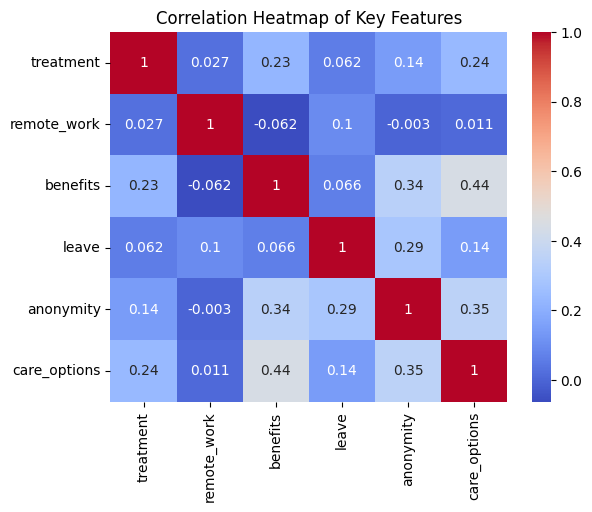

In [ ]:
features = ['treatment', 'remote_work', 'benefits', 'leave', 'anonymity', 'care_options']

data = df_new[features].apply(lambda x: x.astype('category').cat.codes)

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features')
plt.show()


This chart was selected because it provides a clear overview of how key workplace factors are correlated with each other, especially in relation to mental health treatment. The heatmap format allows for quick identification of strong or weak relationships through color intensity, making it easier to interpret patterns in the data.

Key insights include a moderate positive correlation between care_options and treatment (0.24), suggesting that employees who are aware of their care options are more likely to seek mental health treatment. Similarly, benefits shows notable correlations with both treatment (0.23) and care_options (0.44), indicating that having benefits is closely tied to both awareness and action. Another significant relationship is between anonymity and care_options (0.35), highlighting that employees who feel their privacy is protected are also more likely to be aware of mental health resources.

These insights can help organizations focus their mental health strategies. Improving communication around benefits and ensuring anonymity may boost treatment rates and overall well-being. Neglecting these factors could lead to underutilized programs, missed intervention opportunities, and a workforce that remains silent about mental health needs—ultimately impacting morale, retention, and productivity.

#**SOLUTION TO BUSINESS OBJECTIVE**

***Improve mental health benefits*** – Ensure clear, accessible, and
well-communicated support options for employees.

***Foster openness*** – Encourage safe conversations about mental health with supervisors and coworkers.

***Protect employee privacy*** – Strengthen anonymity when employees seek help.

***Normalize mental health leave*** – Make it as acceptable and easy as physical health leave so as to support the employees

***Run awareness programs*** – Offer regular wellness discussions, resources,sponsoring monthly medical checkups and help-seeking guidance.



##**CONCLUSION**

Mental health challenges in tech-based companies are both prevalent and multifaceted. The data reveals significant disparities in how mental health is perceived and addressed—particularly across gender, employment type, and access to workplace support. While progress has been made in reducing stigma, many employees still hesitate to seek treatment due to fear of consequences or lack of available resources. Remote workers and self-employed individuals, for example, often face unique hurdles in accessing consistent care. Moreover, the perception that mental health is treated less seriously than physical health remains a barrier to open discussion and support. To drive meaningful change, tech organizations must implement comprehensive strategies that promote psychological safety, normalize mental health conversations, and ensure equal, confidential access to care. Prioritizing mental well-being is not only an ethical responsibility—it also leads to improved employee satisfaction, retention, and overall organizational performance.